Честнова Екатерина ИУ5-62Б


Рк 2 Вариант 20

Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы: Метод опорных векторов,	Случайный лес. Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving impeachment-polls.csv to impeachment-polls.csv


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('./impeachment-polls.csv', sep=',')

In [5]:
df.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


**Выполним предобработку данных**

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       542 non-null    object 
 1   End         542 non-null    object 
 2   Pollster    542 non-null    object 
 3   Sponsor     276 non-null    object 
 4   SampleSize  542 non-null    int64  
 5   Pop         542 non-null    object 
 6   tracking    114 non-null    object 
 7   Text        541 non-null    object 
 8   Category    541 non-null    object 
 9   Include?    542 non-null    object 
 10  Yes         542 non-null    float64
 11  No          542 non-null    float64
 12  Unsure      521 non-null    float64
 13  Rep Sample  475 non-null    float64
 14  Rep Yes     509 non-null    float64
 15  Rep No      492 non-null    float64
 16  Dem Sample  477 non-null    float64
 17  Dem Yes     515 non-null    float64
 18  Dem No      491 non-null    float64
 19  Ind Sample  409 non-null    f

In [8]:
#Проверим на пропуски
df.isnull().sum()

Start           0
End             0
Pollster        0
Sponsor       266
SampleSize      0
Pop             0
tracking      428
Text            1
Category        1
Include?        0
Yes             0
No              0
Unsure         21
Rep Sample     67
Rep Yes        33
Rep No         50
Dem Sample     65
Dem Yes        27
Dem No         51
Ind Sample    133
Ind Yes        95
Ind No        112
URL             1
Notes         535
dtype: int64

In [11]:
df1 = df.drop(['tracking', 'Notes', 'Sponsor'], axis=1)
#df.drop('Notes', axis=1)
df1.isnull().sum()

Start           0
End             0
Pollster        0
SampleSize      0
Pop             0
Text            1
Category        1
Include?        0
Yes             0
No              0
Unsure         21
Rep Sample     67
Rep Yes        33
Rep No         50
Dem Sample     65
Dem Yes        27
Dem No         51
Ind Sample    133
Ind Yes        95
Ind No        112
URL             1
dtype: int64

In [16]:
df2 = df1.dropna()
df2.isnull().sum()

Start         0
End           0
Pollster      0
SampleSize    0
Pop           0
Text          0
Category      0
Include?      0
Yes           0
No            0
Unsure        0
Rep Sample    0
Rep Yes       0
Rep No        0
Dem Sample    0
Dem Yes       0
Dem No        0
Ind Sample    0
Ind Yes       0
Ind No        0
URL           0
dtype: int64

In [17]:
df2.describe()

,SampleSize,Yes,No,Unsure,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,1652.235897,44.355641,44.868974,10.789487,530.164103,10.527692,84.239487,615.376923,77.625641,13.323846,440.564103,39.799487,43.315385
std,1213.976110,4.813681,5.305436,4.862983,514.306320,3.616444,5.430177,494.539519,7.947340,5.834004,203.764494,6.242750,7.494301
min,500.000000,28.000000,28.000000,1.000000,111.000000,2.000000,64.000000,164.000000,53.000000,4.000000,55.000000,22.000000,16.000000
25%,1000.000000,41.000000,41.500000,7.000000,312.250000,8.000000,81.000000,355.750000,72.000000,9.000000,296.000000,36.000000,38.800000
50%,1468.000000,45.000000,43.300000,12.000000,388.000000,10.950000,83.000000,480.500000,78.000000,12.000000,416.000000,39.000000,42.000000
75%,1993.000000,48.000000,47.000000,14.350000,639.000000,13.000000,88.000000,736.000000,84.000000,16.875000,580.250000,44.000000,47.000000
max,18101.000000,58.000000,66.000000,28.000000,8368.000000,28.000000,97.000000,6989.000000,95.000000,38.000000,2290.000000,58.000000,70.000000


In [29]:
df2.dtypes

Start          object
End            object
Pollster       object
SampleSize      int64
Pop            object
Text           object
Category        int64
Include?       object
Yes           float64
No            float64
Unsure        float64
Rep Sample    float64
Rep Yes       float64
Rep No        float64
Dem Sample    float64
Dem Yes       float64
Dem No        float64
Ind Sample    float64
Ind Yes       float64
Ind No        float64
URL            object
dtype: object

Для решения задачи классификации выполним кодирование категориальных признаков

In [18]:
from sklearn.preprocessing import LabelEncoder

In [38]:
#df2['Category'].unique()
for col in df2.columns:
    print('{} - {}'.format(col, len(df2[col].unique())))

Start - 248
End - 234
Pollster - 26
SampleSize - 181
Pop - 3
Text - 94
Category - 8
Include? - 2
Yes - 68
No - 69
Unsure - 58
Rep Sample - 231
Rep Yes - 55
Rep No - 64
Dem Sample - 253
Dem Yes - 81
Dem No - 72
Ind Sample - 229
Ind Yes - 58
Ind No - 69
URL - 271


In [40]:
#преобразование
le1 = LabelEncoder()
df2["Category"] = le1.fit_transform(df2['Category'])
df2["Start"] = le1.fit_transform(df2['Start'])
df2["End"] = le1.fit_transform(df2['End'])
df2["Pollster"] = le1.fit_transform(df2['Pollster'])
df2["Pop"] = le1.fit_transform(df2['Pop'])
df2["Text"] = le1.fit_transform(df2['Text'])
df2["Include?"] = le1.fit_transform(df2['Include?'])
df2["URL"] = le1.fit_transform(df2['URL'])
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Start,End,Pollster,SampleSize,Pop,Text,Category,Include?,Yes,No,...,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL
0,190,188,0,1008,0,28,1,1,37.0,59.0,...,232.0,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,80
1,162,158,0,1001,0,28,1,1,37.0,56.0,...,260.0,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,81
2,12,16,0,1001,0,28,1,1,40.0,55.0,...,240.0,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,269
3,224,213,0,1003,0,28,1,1,49.0,46.0,...,251.0,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,205
4,198,178,4,1559,2,63,0,1,43.0,51.0,...,483.0,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,44


In [41]:
df2.dtypes

Start           int64
End             int64
Pollster        int64
SampleSize      int64
Pop             int64
Text            int64
Category        int64
Include?        int64
Yes           float64
No            float64
Unsure        float64
Rep Sample    float64
Rep Yes       float64
Rep No        float64
Dem Sample    float64
Dem Yes       float64
Dem No        float64
Ind Sample    float64
Ind Yes       float64
Ind No        float64
URL             int64
dtype: object

**Решение задачи классификации**

Будем оценить модели при помощи метрик F1, Precision и Recall, а также построим матрицы ошибок. Дисбаланс классов учитываем в виде веса классов.

In [105]:
def print_metrics(y_test, y_pred):
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")  
  print(f"Precision: {precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))}")
  print(f"Recall: {recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))}")
  print(f"F1: {f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))}")
  #print(f"Report: {classification_report(y_test, y_pred, output_dict=True)}")

In [48]:
y = df2['Category']
x = df2.drop('Category', axis=1)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

Метод SVM


Precision: 0.45372071397790925
Recall: 0.654320987654321
F1: 0.5276094276094276


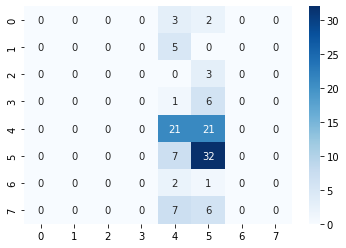

In [107]:
svm1 = SVC()
est1 = svm1.fit(x_train, y_train)
y_pred1 = est1.predict(x_test)
print_metrics(y_test, y_pred1)

In [112]:
param_range = np.arange(1, 62, 2)
svm_parameters = [{'C': param_range}]
svm_best = GridSearchCV(svm1, svm_parameters,
                  cv=5, scoring="f1_weighted", n_jobs=-1)
svm_best.fit(x, y)
print(svm_best.best_params_)

{'C': 61}


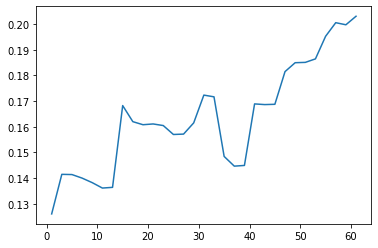

In [101]:
plt.plot(param_range, svm_best.cv_results_["mean_test_score"]);

Precision: 0.5281543686945008
Recall: 0.6226415094339622
F1: 0.5640562408948413


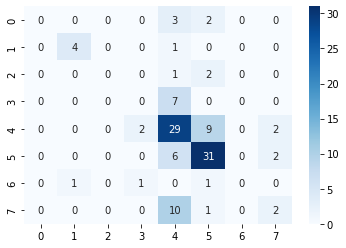

In [113]:
est2 = svm_best.best_estimator_.fit(x_train, y_train)
y_pred2 = est2.predict(x_test)
print_metrics(y_test, y_pred2)

Cлучайный лес

Precision: 0.7740183792815372
Recall: 0.7894736842105263
F1: 0.7790935672514621


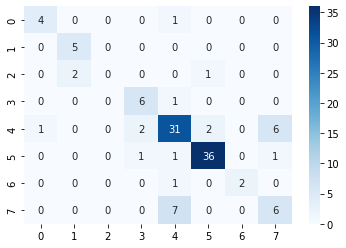

In [122]:
forest1 = RandomForestClassifier()
est3 = forest1.fit(x_train, y_train)
y_pred3 = est3.predict(x_test)
print_metrics(y_test, y_pred3)


In [123]:
f_params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
forest_best = GridSearchCV(forest1, f_params, cv=10, n_jobs=-1, scoring='f1_weighted')
forest_best.fit(x, y)
print(forest_best.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


{'criterion': 'entropy', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 50}


Precision: 0.7663362952836638
Recall: 0.7719298245614035
F1: 0.764624254434536


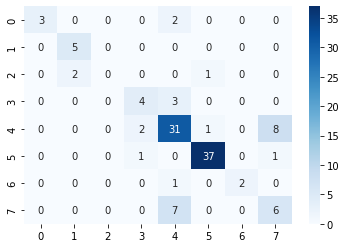

In [124]:
est4 = forest_best.best_estimator_.fit(x_train, y_train)
y_pred4 = est4.predict(x_test)
print_metrics(y_test, y_pred4)

**Сравнение результатов**

Выведем лучшие результаты моделей


Метод SVM
Precision: 0.5281543686945008
Recall: 0.6226415094339622
F1: 0.5640562408948413


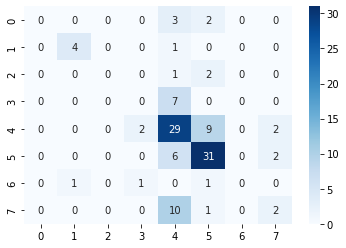

In [127]:
print("Метод SVM")
print_metrics(y_test, y_pred2)

Метод Случайного леса
Precision: 0.7740183792815372
Recall: 0.7894736842105263
F1: 0.7790935672514621


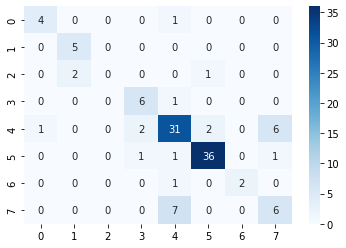

In [130]:
print("Метод Случайного леса")
print_metrics(y_test, y_pred3)

Для метода случайного леса модель по умолчанию оказалась лучше модели с подобранными параметрами.
Эта же модель показала лучшие результаты по сравнению с моделями SVM.
Вывод: небинарную классификацию в условии дисбаланса класса лучше всего реализовал метод Случайного леса.